In [7]:
from stickerGR import *
from nodefun import *
GR.RunThreaded(video=False,updrounds=10)

['V_PV', 'P_PV_Out', 'E_SC', 'V_SC', 'E_Batt', 'V_Batt', 'NF_Monitor', 'M_reset']
['TotalEnergy', 'PowerLowAlert', 'PowerShuttingDown', 'P_Tot_Out', 'V_Tot_Out', 'P_To_Reg', 'V_To_Reg', 'P_Sensors', 'Data_Sensors', 'OnState_Sensors', 'P_Indicator', 'OnState_indicator', 'OnState_Radio', 'PositioningRadio', 'RadioMessagePush', 'RadioMessagePull', 'NFC', 'NF_Microcontroller', 'MC_mode']


In [ ]:
from graafi import *
import numpy as np
import cv2
#GR.RunThreaded(video=False, updrounds=1400)

In [8]:
GR.RunThreaded(video=False, updrounds=10)

['V_PV', 'P_PV_Out', 'E_SC', 'V_SC', 'E_Batt', 'V_Batt', 'NF_Monitor', 'M_reset']


In [ ]:
for n in GR.nodes:
    print(n.label,n.cargo)

In [ ]:
#Q=CU
#dQ = I dt = CdU
#E=1/2 C U*2
#dE = P dt = UI dt = E_u-E_i = 1/2 C(U_u*U_u - U_i*U_i)
#U_u = np.sqrt(2/C * (E_u -E_i) + U_i*U_i)
#    = np.sqrt(2/C P dt + U_i*U_i)
#dU = U_u-U_i = np.sqrt(2/C * (E_u -E_i) + U_i*U_i) -U_i

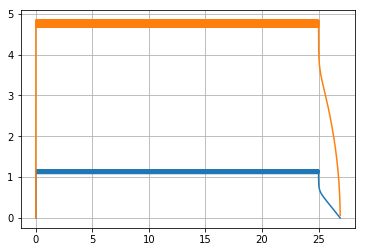

In [14]:
import pylab as pl
import numpy as np

n_sc=3
C1=0.3
C = C1/n_sc # 1/C = 1/C1 + 1/C1 + 1/C1 +...
Uc=0.001#1.2*n_sc
P=+0.003
dt = 60
dE = P * dt



t=[0]
U = [Uc]
E = [C*0.5*Uc*Uc]
I = [P / Uc]
I_vuo=[0] #vuoto

done1=False
done2=False
while True:
    if -1*dE > E[-1]:
        break
    if t[-1] >60:
        break
    #if U[-1]>n_sc*1.2 and done1== False:
    #    done1=True
    #    P=0
    #    dE = P * dt
    if t[-1]>25 and done2== False:
        done2=True
        P=-.000004
        dE = P * dt
    vuoto = np.power(10,(Uc/n_sc - 1.06)/0.14-7) * Uc/n_sc * dt 
    I_vuo.append(vuoto/Uc/dt*n_sc)
    U1 = np.sqrt(2 / C1 * (dE/n_sc - vuoto) + Uc/n_sc * Uc/n_sc)
    Uc = U1*n_sc
    U.append(Uc)
    E.append(C1*0.5*U1*U1*n_sc)
    I.append(P/n_sc / U1)
    t.append(t[-1]+dt/3600/24)

I_vuo[0]=I_vuo[1]

Um =[1.20,1.18,1.165,1.09,1.06,1.040,1.00,0.95,0.92,0.895]
tm =[0.00,0.10,0.200,0.95,1.85,2.800,5.00,12.0,21.0,29.00]
vUm=[1.10,1.08,1.050,1.03,1.00,0.985,0.95,0.925,0.9,0.880]
I_vm=[np.power(10,(v-1.2)/0.1-5)  for v in vUm]

I_vuom=[]
for u in Um:
    vuoto = np.power(10,(u - 1.06)/0.14-7) 
    I_vuom.append(vuoto)
I_vuom[0]=I_vuom[1]

#
#pl.plot(t,U)
#pl.plot(tm,Um,"*")
#pl.plot(t[:-1],I[:-1])

#pl.semilogy(t,I_vuo)
#pl.semilogy(tm,I_vuom,"*-")
#pl.semilogy(tm,I_vm,"+")
#pl.grid()
#pl.show()

pl.plot(t,E)
pl.plot(t,U)
#pl.plot(tm,Um,"*")
pl.grid()
pl.show()


In [ ]:
U[-1]

In [ ]:
    
    n_sc = 3
    C1 = 0.3 #TUT /NA supercap
    
    V_SC1= V_SC/n_sc
    vuoto = np.power(10,(V_SC1 - 1.06)/0.14-7) * V_SC* dt #TUT /NA supercap
    
    ######################
    #  E=1/2 C U*2
    #  dE = P dt = UI dt = E_u-E_i = 1/2 C(U_u*U_u - U_i*U_i)
    #  U_u = np.sqrt(2/C * (E_u -E_i) + U_i*U_i)
    ######################

    dE = (P_SC_In - vuoto - P_SC_Out) * dt 

    if -1 * dE < E_SC:
        V_SC1 = np.sqrt(2 / C1 * dE/ n_sc + V_SC1 * V_SC1)
    else: 
        V_SC1 = 0
    
    E_SC +=  dE
    #E_SC = min(E_SC,1000)
    E_SC = max(E_SC,0)
    V_SC = max(V_SC1 * n_sc,0)
    
    
    
           self.P={"off":0.0,"shutdown":0.000005,"deepsleep":0.000003,"wakingfromdeepsleep":0.000010,\
                "sleep":0.000007,"wakingfromsleep":0.00001,"energysaving":0.00001,"booting":0.00001,"ON":0.00002} 

